<a href="https://colab.research.google.com/github/ziqlu0722/Machine-Learning/blob/master/BinarySearchTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Search Tree

![alt text](https://algs4.cs.princeton.edu/32bst/images/bst-anatomy.png)


## SEARCH
![alt text](https://algs4.cs.princeton.edu/32bst/images/bst-search.png)



## INSERT
![alt text](https://algs4.cs.princeton.edu/32bst/images/bst-insert.png)



## DELETE THE MINIMUM
![alt text](https://algs4.cs.princeton.edu/32bst/images/bst-deletemin.png)


## DELETION
![alt text](https://algs4.cs.princeton.edu/32bst/images/bst-delete.png)

In [0]:
from collections import deque
class Node:
  
  def __init__(self, key, value, left=None, right=None):
    self.key = key
    self.value = value
    self.left = left
    self.right = right  
  
class BinaryTree:
  
  def __init__(self):
    self.root = None
    self.size = 0    
    
  def insert(self, key, value):
    self.root = self.__insert(self.root, key, value)
    
  # 向以node为根的二分搜索树中插入新的元素（key, value)  
  # 返回插入新结点后二分搜索树的Node 
  def __insert(self, node, key, value):
    
    if not node:
      self.size += 1
      return Node(key, value)
    
    elif node:
    
      if node.key == key:
        node.value = value
      elif node.key > key:
        # if node.left = None, node.left will be assigned to Node(key, value)
        node.left = self.__insert(node.left, key, value) 
      else:
        # if node.right = None, node.right will be assigned to Node(key, value)
        node.right = self.__insert(node.right, key, value)
      
    return node
  
  #看二分搜索树中是否包含元素e
  def contains(self, key, value):
    return self.__contains(self.root, key, value)


  #看以node为根的二分搜索树中是否包含元素e
  def __contains(self, node, key, value):
    if node:
      if node.key == key:
        return True
      elif node.key < key:
        self.__contains(node.right, key, value)
      elif node.key > key:
        self.__contains(node.left, key, value)
    return False
      
  #看二分搜索树中是否包含元素e - iterative   
  def contains_2(self, key, value):
      node = self.root
      while node:
        if key > node.key:
            node = node.right
        elif key < node.key:
            node = node.left
        else:
            return True
      return False
    
  
  # 前序遍历以node为根的二分搜索树
  def preOrder(self, node):
    
    if not node:
      return
    print(node.value)
    self.preOrder(node.left)
    self.preOrder(node.right)    
  
  def preOrder_2(self, node):
    stack = []
    stack.append(node)
    while stack:
      cur = stack.pop()
      # 访问该节点
      print(cur.value)
      # 把左右子树压入栈，先右后左，因为先进后出
      if cur.right:
        stack.append(cur.right)
      if cur.left:
        stack.append(cur.left)
        
 
  # 中序遍历以node为根的二分搜索树
  def inOrder(self, node):
    
    if not node:
      return

    self.inOrder(node.left)
    print(node.value)
    self.inOrder(node.right)
    
    
  # 后序遍历以node为根的二分搜索树
  def postOrder(self, node):
    
    if not node:
      return

    self.postOrder(node.left)
    self.postOrder(node.right)
    print(node.value)

    
  # 层序遍历以node为根的二分搜索树  
  def levelOrder(self, node):
    queue = deque([])
    queue.append(node)
    
    while queue:
      cur = queue.popleft()
      print(cur.value)
      if cur.left:
        queue.append(cur.left)
      if cur.right:
        queue.append(cur.right)
    
  # 返回以node为根的二分搜索树的最小值
  def min(self):
    if self.size == 0:
      print('BST is empty')
    return self.__min(self.root)
    
  def __min(self, node):
    if not node.left:
      return node 
    return self.__min(node.left)

  def min_2(self, node):

    while node.left:
      node = node.left

    return node.value
  
  
  def max(self, node):

    while node.right:
      node = node.right

    return node.value  
  
  # 从二分搜索树中删除最小值所在的结点，并返回该值
  def removeMin(self):
    res = self.min()
    root = self.__removeMin(self.root)
    
    return res
  
  # 删除以node为根的二分搜索树的最小节点
  # 返回删除节点后新的二分搜索树的根
  def __removeMin(self, node):
    if not node.left:
      rightNode = node.right
      node.right = None
      self.size -= 1
      return rightNode
    node.left = self.__removeMin(node.left)
    return node

 
  def remove(self, key, value):
    self.root = self.__remove(self.root, key, value)
  
  
  # 删除以node为根的二分搜索树中key为key的结点
  # 返回删除结点后新的二分搜索树的根
  def __remove(self, node, key, value):
    
    if not node:
      return None
    
    if key < node.key:
      node.left = self.__remove(node.left, key, value)
      return node
    elif key > node.key:
      node.right = self.__remove(node.right, key, value)
      return node
    elif key == node.key:
      if not node.left:
        rightNode = node.right
        node.right = None
        self.size -=1
        return rightNode
      # 待删除结点右子树为空
      elif not node.right:
        # 保存左子树
        leftNode = node.left
        # 删除node
        node.left = None
        self.size -=1
        return leftNode  
      # 待删除结点左右子树都不为空
      # 找到比删除结点大的最小值，i.e.待删除结点右子树的最小节点
      # 用这个结点替代待删除结点的位置
      else:
        successor = self.min(node.right)
        successor.right = removeMin(node.right)
        successor.left = node.left
        # 删除node
        node.left = node.right = None        
        return successor

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(G, node, pos={}, x=0, y=0, layer=1):
    pos[node.value] = (x, y)
    if node.left:
        G.add_edge(node.value, node.left.value)
        l_x, l_y = x - 1 / 2 ** layer, y - 1
        l_layer = layer + 1
        create_graph(G, node.left, x=l_x, y=l_y, pos=pos, layer=l_layer)
    if node.right:
        G.add_edge(node.value, node.right.value)
        r_x, r_y = x + 1 / 2 ** layer, y - 1
        r_layer = layer + 1
        create_graph(G, node.right, x=r_x, y=r_y, pos=pos, layer=r_layer)
    return (G, pos)

def draw(node):   # 以某个节点为根画图
    graph = nx.DiGraph()
    graph, pos = create_graph(graph, node)
    fig, ax = plt.subplots(figsize=(8, 10))  # 比例可以根据树的深度适当调节
    nx.draw_networkx(graph, pos, ax=ax, node_size=1000)
    plt.show()

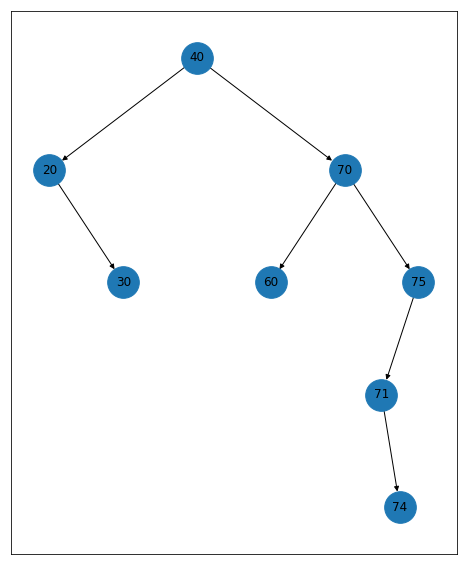

In [0]:
l = [40, 20, 30, 70, 60, 75, 71, 74]
tree = BinaryTree()
for i in l:  
  tree.insert(i, i)
draw(tree.root)

In [0]:
tree.contains_2(41,41), tree.contains_2(40,40)

(False, True)

In [0]:
tree.contains(41,41), tree.contains(40,40)

(False, True)

In [0]:
tree.preOrder(tree.root)

40
20
30
70
60
75
71
74


In [0]:
tree.preOrder_2(tree.root)

40
20
30
70
60
75
71
74


In [0]:
tree.inOrder(tree.root)

20
30
40
60
70
71
74
75


In [0]:
tree.postOrder(tree.root)

30
20
60
74
71
75
70
40


In [0]:
tree.levelOrder(tree.root)

40
20
70
30
60
75
71
74


In [0]:
tree.min()

In [0]:
tree.min_2(tree.root)

20

In [0]:
tree.max(tree.root)

75

In [0]:
tree.removeMin()

In [0]:
tree.inOrder(tree.root)

30
40
60
70
71
74
75


In [0]:
tree.remove(30, 30)

In [0]:
tree.inOrder(tree.root)

40
60
70
71
74
75


In [0]:
 # class Solution(object):
    def deleteNode(self, root, key):
        """
        :type root: TreeNode
        :type key: int
        :rtype: TreeNode
        """
        # 1. find the node to be deleted
        dummy = TreeNode(0)
        dummy.left = root
        p = root 
        parent = dummy
        while p is not None and p.val != key:
            parent = p
            if p.val > key:
                p = p.left
            else:
                p = p.right
        if p is None: # not found
            return root
        # 2. find the minimum of p's right subtree
        q_parent = p
        q = p.right
        if q is None: # p has no right subtree, just promote its left subtree
            if parent.left == p:
                parent.left = p.left
            else:
                parent.right = p.left
        else:
            while q.left is not None:
                q_parent = q
                q = q.left
            # exchange value between the minimum q and p
            p.val = q.val
            # promote q's right child
            if q_parent.left == q:
                q_parent.left = q.right
            else:
                q_parent.right = q.right
        return dummy.left